<a href="https://colab.research.google.com/github/juacarsud/aprendizaje_automatico/blob/main/Aprendizaje_Automatico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ACTIVIDAD : DETECCIÓN DE ANOMALÍAS Y TÉCNICAS DE AGRUPAMIENTO
**ALUMNO**: AUCCAPUCLLA MACCERHUA JUAN CARLOS

**CURSO**: APRENDIZAJE AUTOMÁTICO


In [2]:
from google.colab import drive, files
import pandas as pd
import  numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.ensemble import IsolationForest
from sklearn.cluster import KMeans, MeanShift, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler


## AGREGAR LA FUENTE DE DATOS
#drive.mount('/content/drive', force_remount=True)

#file_path = '/content/drive/My Drive/Colab Notebooks/CTG.csv'
#file_path = '/content/CTG.csv'
url_github = 'https://raw.githubusercontent.com/juacarsud/aprendizaje_automatico/refs/heads/main/CTG.csv'
df = pd.read_csv(url_github)
print(df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129 entries, 0 to 2128
Data columns (total 40 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   FileName  2126 non-null   object 
 1   Date      2126 non-null   object 
 2   SegFile   2126 non-null   object 
 3   b         2126 non-null   float64
 4   e         2126 non-null   float64
 5   LBE       2126 non-null   float64
 6   LB        2126 non-null   float64
 7   AC        2126 non-null   float64
 8   FM        2127 non-null   float64
 9   UC        2127 non-null   float64
 10  ASTV      2127 non-null   float64
 11  MSTV      2127 non-null   float64
 12  ALTV      2127 non-null   float64
 13  MLTV      2127 non-null   float64
 14  DL        2128 non-null   float64
 15  DS        2128 non-null   float64
 16  DP        2128 non-null   float64
 17  DR        2128 non-null   float64
 18  Width     2126 non-null   float64
 19  Min       2126 non-null   float64
 20  Max       2126 non-null   floa

#Hallar Datos Estadisticos

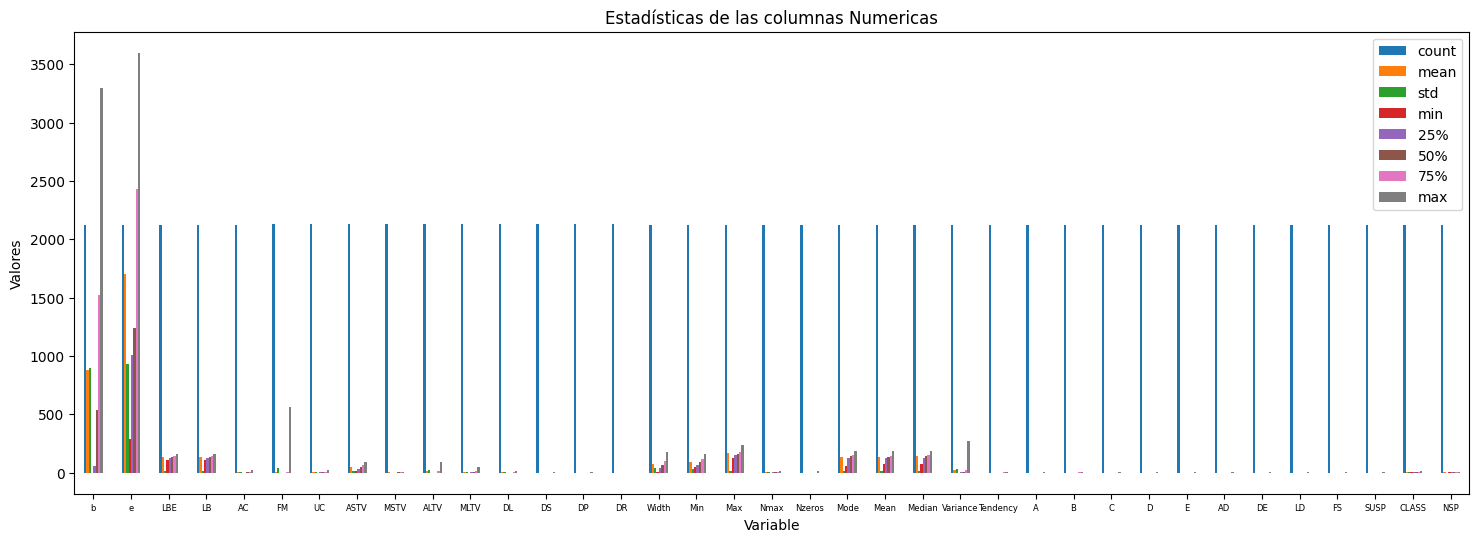

                 b            e          LBE           LB           AC  \
count  2126.000000  2126.000000  2126.000000  2126.000000  2126.000000   
mean    878.439793  1702.877234   133.303857   133.303857     2.722484   
std     894.084748   930.919143     9.840844     9.840844     3.560850   
min       0.000000   287.000000   106.000000   106.000000     0.000000   
25%      55.000000  1009.000000   126.000000   126.000000     0.000000   
50%     538.000000  1241.000000   133.000000   133.000000     1.000000   
75%    1521.000000  2434.750000   140.000000   140.000000     4.000000   
max    3296.000000  3599.000000   160.000000   160.000000    26.000000   

                FM           UC         ASTV         MSTV         ALTV  ...  \
count  2127.000000  2127.000000  2127.000000  2127.000000  2127.000000  ...   
mean      7.503056     3.669017    47.008933     1.335449     9.884814  ...   
std      39.030452     2.877148    17.210648     0.891543    18.476534  ...   
min       0.00000

In [3]:
## HALLAR LOS DATOS ESTADÍSTICOS
estadisticas = df.describe()
estadisticas.T.plot(kind='bar', figsize=(18, 6))
plt.title('Estadísticas de las columnas Numericas')
plt.xlabel('Variable')
plt.ylabel('Valores')
plt.xticks(rotation=0, fontsize=6)
plt.legend(loc='best')
plt.show()

print(estadisticas)

# DE LAS VARIABLES CATEGÓRICAS, LISTAR LAS DIFERENTES CATEGORIAS Y HALLAR LA FRECUENCIA DE CADA UNA.

In [4]:
columnas_categoricas = df.select_dtypes(include=['object', 'category']).columns
arreglo_frecuencias = []
for columna in columnas_categoricas:
    frecuencias = df[columna].value_counts()
    arreglo_frecuencias.append(frecuencias)
    print(f"Frecuencias para la columna '{columna}':")
    print(frecuencias)

Frecuencias para la columna 'FileName':
FileName
S8001034.dsp    34
S7001029.dsp    33
S8001037.dsp    30
S8001038.dsp    26
S7001027.dsp    24
                ..
S7001006.dsp     1
S7001008.dsp     1
Mepfp_3.txt      1
Mrmmf_1.txt      1
Variab10.txt     1
Name: count, Length: 352, dtype: int64
Frecuencias para la columna 'Date':
Date
2/22/1995     240
5/2/1996      160
7/18/1996     101
10/3/1996      92
5/3/1996       88
5/10/1998      85
5/1/1996       79
10/6/1996      79
6/6/1998       77
9/25/1996      74
1/8/1995       71
10/25/1997     70
1/4/1980       56
8/20/1996      55
11/26/1997     53
4/8/1998       53
5/6/1996       53
8/28/1996      52
12/9/1996      50
8/16/1996      43
7/16/1996      42
11/14/1997     38
9/23/1996      37
10/24/1997     34
12/20/1997     33
10/1/1997      30
3/23/1998      29
8/19/1996      28
9/20/1996      24
3/10/1997      23
8/31/1996      22
10/14/1996     21
1/2/1997       21
8/21/1996      19
9/10/1997      17
9/26/1996      10
12/23/1996    

#CREAR UNA MATRIZ DE CORRELACIONES EXISTENTES ENTRE LAS VARIABLES NUMÉRICAS

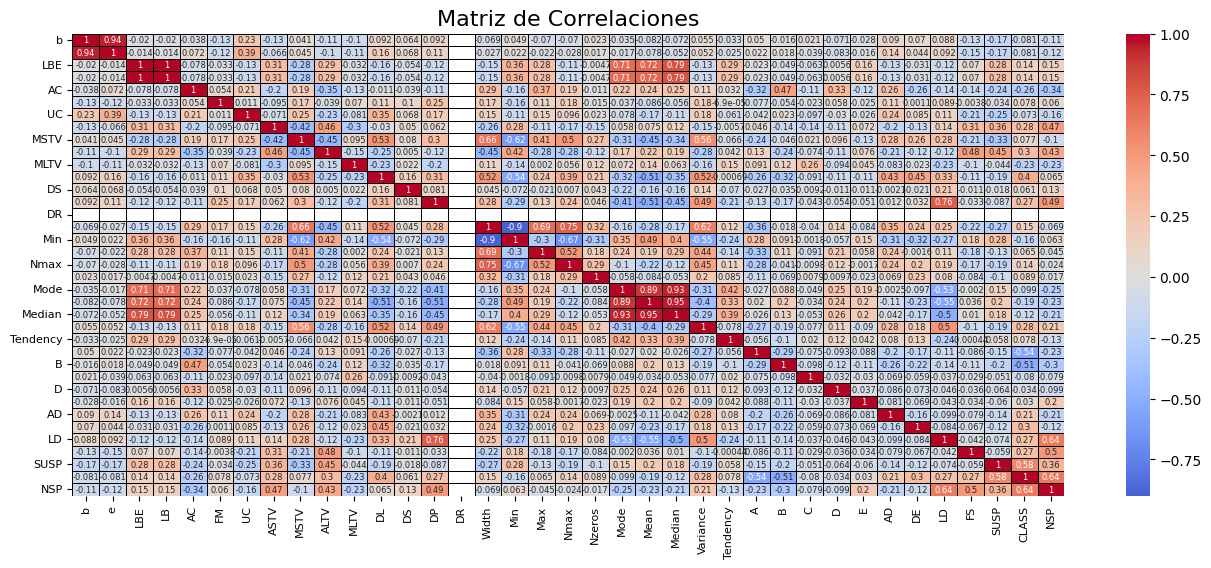

In [5]:
columnas_numéricas = df.select_dtypes(include=['int64', 'float64']).columns
matriz_correlaciones = df[columnas_numéricas].corr()
plt.figure(figsize=(16,6))
sns.heatmap(matriz_correlaciones, annot=True, cmap='coolwarm', center=0, linewidths=0.5, linecolor='black', annot_kws={"size": 6} )
plt.title('Matriz de Correlaciones', fontsize=16)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

#TRATAMIENTO DE MISSINGS

In [6]:
valores_missing = df.isnull().sum()
print("MISSING ENCONTRADO")
print(valores_missing)
imputador = KNNImputer(n_neighbors=5)
df_col_nums = df.select_dtypes(include=['int64', 'float64'])
df_imputado = pd.DataFrame(imputador.fit_transform(df_col_nums), columns=df_col_nums.columns)
valores_innputados = df_imputado.isnull().sum()
print("Missing despues de Imputación")
print(valores_innputados)

MISSING ENCONTRADO
FileName    3
Date        3
SegFile     3
b           3
e           3
LBE         3
LB          3
AC          3
FM          2
UC          2
ASTV        2
MSTV        2
ALTV        2
MLTV        2
DL          1
DS          1
DP          1
DR          1
Width       3
Min         3
Max         3
Nmax        3
Nzeros      3
Mode        3
Mean        3
Median      3
Variance    3
Tendency    3
A           3
B           3
C           3
D           3
E           3
AD          3
DE          3
LD          3
FS          3
SUSP        3
CLASS       3
NSP         3
dtype: int64
Missing despues de Imputación
b           0
e           0
LBE         0
LB          0
AC          0
FM          0
UC          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
DL          0
DS          0
DP          0
DR          0
Width       0
Min         0
Max         0
Nmax        0
Nzeros      0
Mode        0
Mean        0
Median      0
Variance    0
Tendency    0
A           0
B           0


#DETECCION DE ANOMALÍAS

Número de anomalías detectadas: 107


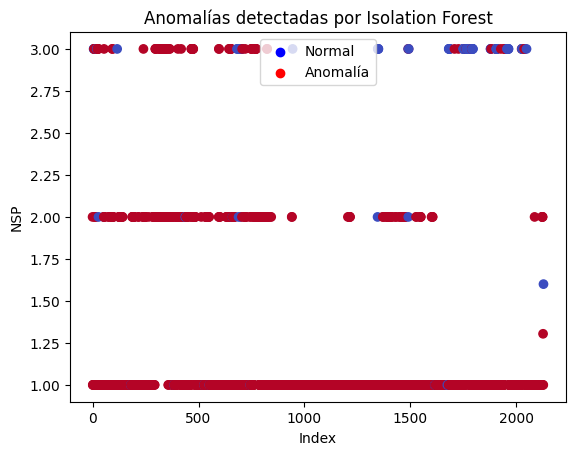

In [7]:
model = IsolationForest(contamination=0.05)
model.fit(df_imputado)
df_imputado['anomaly'] = model.predict(df_imputado)
anomalies = df_imputado[df_imputado['anomaly'] == -1]

# Mostrar el número de anomalías detectadas
num_anomalies = df_imputado['anomaly'].value_counts().get(-1, 0)
print(f"Número de anomalías detectadas: {num_anomalies}")

plt.scatter(df_imputado.index, df_imputado['NSP'], c=df_imputado['anomaly'], cmap='coolwarm')
plt.xlabel('Index')
plt.ylabel('NSP')
plt.title('Anomalías detectadas por Isolation Forest')
plt.scatter([],[], c='blue', label='Normal')
plt.scatter([],[], c='red', label='Anomalía')
plt.legend(loc='best')

plt.show()

#TÉCNICAS DE AGRUPAMIENTO

K-Means - Coeficiente de Silueta: 0.5988187576754597, Índice de Davies-Bouldin: 0.569491823061245
DBSCAN - Coeficiente de Silueta: -0.3498187088045739, Índice de Davies-Bouldin: 2.278314815735181
DBSCAN - Coeficiente de Silueta: -0.690996639202156, Índice de Davies-Bouldin: 2.0174186976885573


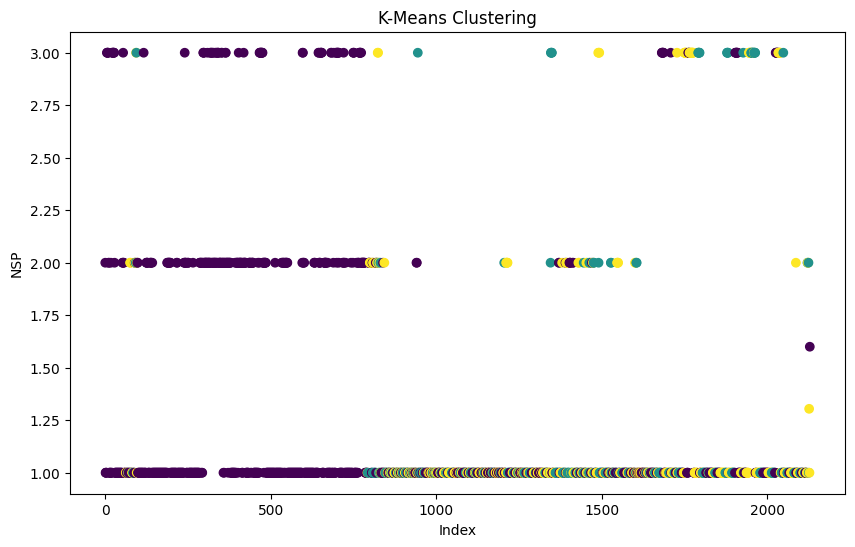

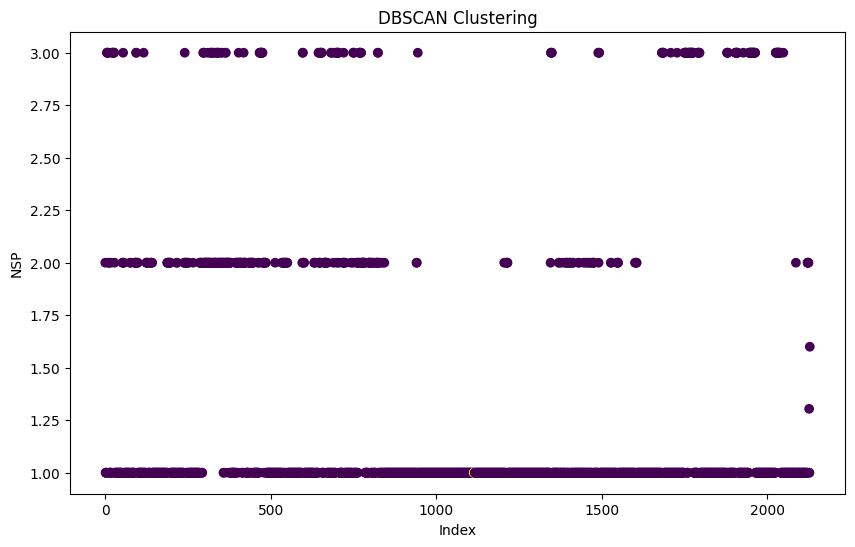

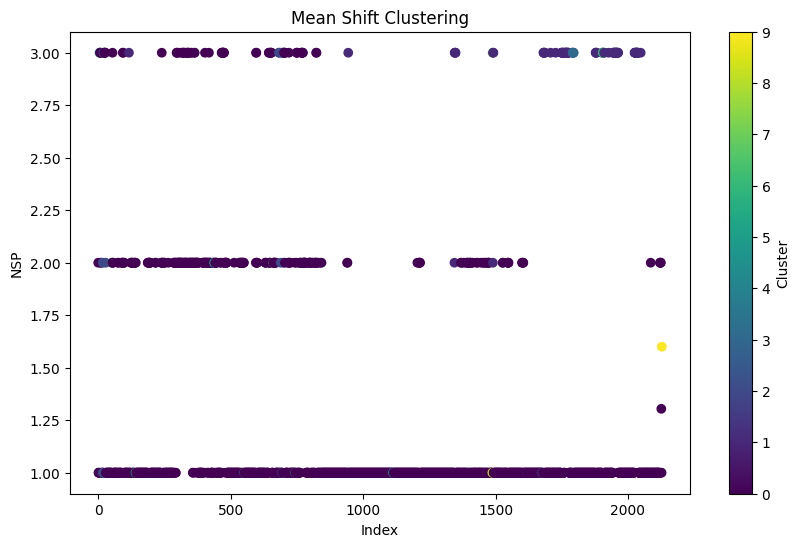

In [8]:
#K_MEANS
kmeans = KMeans(n_clusters=3)
df_imputado['kmeans_cluster'] = kmeans.fit_predict(df_imputado)
silhouette_kmeans = silhouette_score(df_imputado, df_imputado['kmeans_cluster'])
db_kmeans = davies_bouldin_score(df_imputado, df_imputado['kmeans_cluster'])

# DBSCAN Clustering

#df_imputado_scaled = scaler.fit_transform(df_imputado)
dbscan = DBSCAN(eps=0.5, min_samples=3)
df_imputado['dbscan_cluster'] = dbscan.fit_predict(df_imputado)
silhouette_dbscan = silhouette_score(df_imputado, df_imputado['dbscan_cluster'])
db_dbscan = davies_bouldin_score(df_imputado, df_imputado['dbscan_cluster'])

# MEANSHIFT
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_imputado)
mean_shift = MeanShift()
df_imputado['mean_shift_cluster'] = mean_shift.fit_predict(df_scaled)
silhouette_mean_shift = silhouette_score(df_imputado, df_imputado['mean_shift_cluster'])
db_mean_shift = davies_bouldin_score(df_imputado, df_imputado['mean_shift_cluster'])

print(f'K-Means - Coeficiente de Silueta: {silhouette_kmeans}, Índice de Davies-Bouldin: {db_kmeans}')
print(f'DBSCAN - Coeficiente de Silueta: {silhouette_dbscan}, Índice de Davies-Bouldin: {db_dbscan}')
print(f'Meanshift - Coeficiente de Silueta: {silhouette_mean_shift}, Índice de Davies-Bouldin: {db_mean_shift}')

# Visualizar los resultados de K-Means
plt.figure(figsize=(10,6))
plt.scatter(df_imputado.index, df_imputado['NSP'], c=df_imputado['kmeans_cluster'], cmap='viridis')
plt.xlabel('Index')
plt.ylabel('NSP')
plt.title('K-Means Clustering')
plt.show()

# Visualizar los resultados de DBSCAN
plt.figure(figsize=(10,6))
plt.scatter(df_imputado.index, df_imputado['NSP'], c=df_imputado['dbscan_cluster'], cmap='viridis')
plt.xlabel('Index')
plt.ylabel('NSP')
plt.title('DBSCAN Clustering')
plt.show()


# Visualizar los resultados de Mean Shift
plt.figure(figsize=(10,6))
plt.scatter(df_imputado.index, df_imputado['NSP'], c=df_imputado['mean_shift_cluster'], cmap='viridis')
plt.xlabel('Index')
plt.ylabel('NSP')
plt.title('Mean Shift Clustering')
plt.colorbar(label='Cluster')
plt.show()